<img src="https://upload.wikimedia.org/wikipedia/commons/c/c7/HEIG-VD_Logo_96x29_RVB_ROUGE.png" alt="HEIG-VD Logo" width="250"/>

# Cours TAL - Laboratoire 3
# Analyse syntaxique du français

**Objectifs**
1.	Appliquer un analyseur syntaxique **de dépendances** sur des données de test en français et observer les scores.  Entraîner cet analyseur sur des données d'entraînement adaptées, et déterminer si les scores se sont améliorés ou non.
2.	Importer des fichiers annotés dans NLTK, les transformer en **graphes de dépendances**, et trouver les paires sujet-verbe les plus fréquentes.
3.	En appliquant un analyseur **en constituants**, extraire tous les groupes nominaux d'un corpus en français.

**Instructions initiales**

Vous utiliserez les mêmes données que pour le labo 2, car elles contiennent aussi des informations syntaxiques.  Pour rappel, ces données sont disponibles dans [l'archive ZIP fournie sur Cyberlearn au labo 2](https://cyberlearn.hes-so.ch/pluginfile.php/3493142/mod_assign/introattachment/0/UD_French-GSD-withBlankLines.zip?forcedownload=1).  Ces textes en français proviennent du projet [Universal Dependencies (UD)](https://github.com/UniversalDependencies/UD_French-GSD).  Le fichier `fr-ud-train.conllu3` est destiné à l'entraînement, `fr-ud-dev.conllu3` aux tests/réglages préliminaires, et `fr-ud-test.conllu3` à l'évaluation finale.

## 1. Appliquer un analyseur de dépendances.  Entraîner l'analyseur sur les données UD

Dans cette 1ère partie, vous allez appliquer (puis entraîner) le [Stanford Dependency Parser](https://nlp.stanford.edu/software/nndep.html) qui utilise un réseau de neurones.  Comme au Labo 2, vous aurez besoin du code, d'un modèle entraîné, et de la documentation.

* **code Java** : on peut le télécharger dans un [package fourni par Stanford](https://nlp.stanford.edu/software/lex-parser.html) avec d'autres parsers et modèles, mais *on vous recommande* de simplement télécharger l'archive `stanford-corenlp-3.9.2.jar` depuis le [site Maven de Stanford CoreNLP](https://search.maven.org/artifact/edu.stanford.nlp/stanford-corenlp/3.9.2/jar) (choisir *Browse* ou *Downloads*)
* **modèles** : plusieurs modèles sont disponibles sur le site Maven, donc un package pour le français de 272 MB ; comme vous n'aurez besoin que du modèle (UD) pour Universal Dependencies, *on vous recommande* de télécharger le modèle pour UD pré-entraîné `UD_French.gz` mis à disposition pour le cours TAL sur [drive.switch.ch](https://drive.switch.ch/index.php/s/OqlSRUCSBvqKg3O)
* dans la [documentation du parser](https://nlp.stanford.edu/nlp/javadoc/javanlp/edu/stanford/nlp/parser/nndep/DependencyParser.html) regarder surtout le `main()` et les exemples à la fin

**Travail demandé**

Utiliser la documentation pour effectuer les tâches suivantes.

1. Exécuter le parser en Java (avec une commande externe `!java -cp ...` comme au labo 2) en l'appliquant au fichier UD de *test* en français.  Quels sont les deux scores obtenus et que signifient-ils ?
2. Entraîner le parser pour générer un nouveau modèle à partir des données d’entraînement.
3. Exécuter le parser que vous avez entraîné sur le même fichier de test qu'en (1).  Quels scores obtient-il et comment cela se compare avec le modèle fourni ?

**Note** : il est aussi possible d'appeler ce parser depuis NLTK, à condition de lancer le [serveur CoreNLP](https://stanfordnlp.github.io/CoreNLP/corenlp-server.html) et d'utiliser une instance de la classe `CoreNLPDependencyParser` ainsi : `dep_parse = next(dep_parser.raw_parse("La maison est petite."))`.

In [10]:
# Veuillez écrire ici la commande pour tester le parser avec le modèle pré-entraîné.
!java -cp stanford-corenlp-3.9.2.jar edu.stanford.nlp.parser.nndep.DependencyParser \
    -model 'UD_French.gz' \
    -testFile 'fr-ud-dev.conllu3' \
    -verboseResults false

Loading depparse model: UD_French.gz ... 
###################
#Transitions: 81
#Labels: 40
ROOTLABEL: root
PreComputed 99996, Elapsed Time: 13.509 (s)
Initializing dependency parser ... done [15.0 sec].
Test File: fr-ud-dev.conllu3
OOV Words: 2716 / 35771 = 7.59%
UAS = 57.2195
LAS = 43.6722
DependencyParser parsed 35771 words in 1478 sentences in 19.3s at 1857.7 w/s, 76.8 sent/s.


Score obtenu: 
UAS = 57.2195
LAS = 43.6722

# TODO c'est quoi?

**Indications pour l'entraînement**
* pensez donner un nouveau nom au modèle qui sera créé (attention à l'écrasement)
* notez que vous utiliserez à la fois `train` *et* `dev` (voir la documentation)
* évitez un output trop volumineux dans le notebook : redirigez le tout dans un fichier `output.txt` en faisant suivre la commande par `>output.txt 2>&1` (valable sous Linux et Windows)
* plusieurs options indiquées dans la documentation peuvent être utiles
  * `-wordCutOff 3` pour traiter seulement les mots apparaissant plus de 3 fois, ce qui évite notamment le problème des nombres écrits avec un espace (apparaissant 1 fois)
  * `-trainingThreads 4` pour utiliser pleinement votre processeur : indiquez le maximum selon votre modèle
  * `-maxIter 5000` pour arrêter l'entraînement après 5000 itérations (on peut commencer avec beaucoup moins pour estimer le temps nécessaire)

In [ ]:
# Veuillez écrire ici la commande pour entraîner l'analyseur sur le fichier 'train' et créer un nouveau modèle.
# Pour ne pas bloquer le notebook, vous pouvez l'exécuter en ligne de commande.
!java -cp stanford-corenlp-3.9.2.jar edu.stanford.nlp.parser.nndep.DependencyParser \
    -trainFile fr-ud-train.conllu3 \
    -devFile fr-ud-dev.conllu3 \
    -model cool_model.gz \
    -wordCutOff 3 \
    -maxIter 5000 \
    >output.txt 2>&1

In [91]:
# Veuillez écrire ici la commande pour tester l'analyseur avec le nouveau modèle, puis commentez les résultats ci-dessous.
!java -cp stanford-corenlp-3.9.2.jar edu.stanford.nlp.parser.nndep.DependencyParser \
    -model 'cool_model.gz' \
    -testFile 'fr-ud-test.conllu3' \
    -verboseResults false

Loading depparse model: cool_model.gz ... 
Loaded TreebankLanguagePack: edu.stanford.nlp.trees.PennTreebankLanguagePack
###################
#Transitions: 91
#Labels: 45
ROOTLABEL: root
PreComputed 100000, Elapsed Time: 1.53 (s)
Initializing dependency parser ... done [2.8 sec].
Test File: fr-ud-test.conllu3
OOV Words: 1100 / 10020 = 10.98%
UAS = 78.0938
LAS = 71.3972
DependencyParser parsed 10020 words in 416 sentences in 1.0s at 9606.9 w/s, 398.8 sent/s.


**Question subsidiaire**

Écrivez des instructions pour extraire du fichier de logs du *DependencyParser*, une fois l'entraînement fini, l'évolution des scores suivants :
* le score UAS sur l'ensemble de développement (écrit par défaut tous les 100 itérations)
* le taux de correction et la fonction de coût (sur l'ensemble d'entraînement) aux mêmes itérations que les scores UAS

Affichez ces trois valeurs sur un graphe, en fonction du nombre d'itérations sur l'axe horizontal.

In [ ]:
# Veuillez écrire ici le code qui extrait les valeurs.
def parse_output(filename):
    iteration = 0
    cost = 0
    correct = 0
    data_iteration = []
    data_uas = []
    data_cost = []
    data_correct = []
    with open(filename) as o:
        for line in o:
            line = line.strip()
            if line.startswith("##### Iteration "):
                iteration = int(line[16:])
            if line.startswith("UAS: "):
#                 data_uas.append([iteration, float(line[5:])])
                data_iteration.append(iteration)
                data_uas.append(float(line[5:]))
                data_cost.append(cost)
                data_correct.append(correct)
            if line.startswith("Cost = "):
                cost = float(line[7:line.index(',')])
                correct = float(line[line.rindex(' ')+1:])
    return data_iteration, data_uas, data_cost, data_correct

In [ ]:
import matplotlib.pyplot
%matplotlib inline

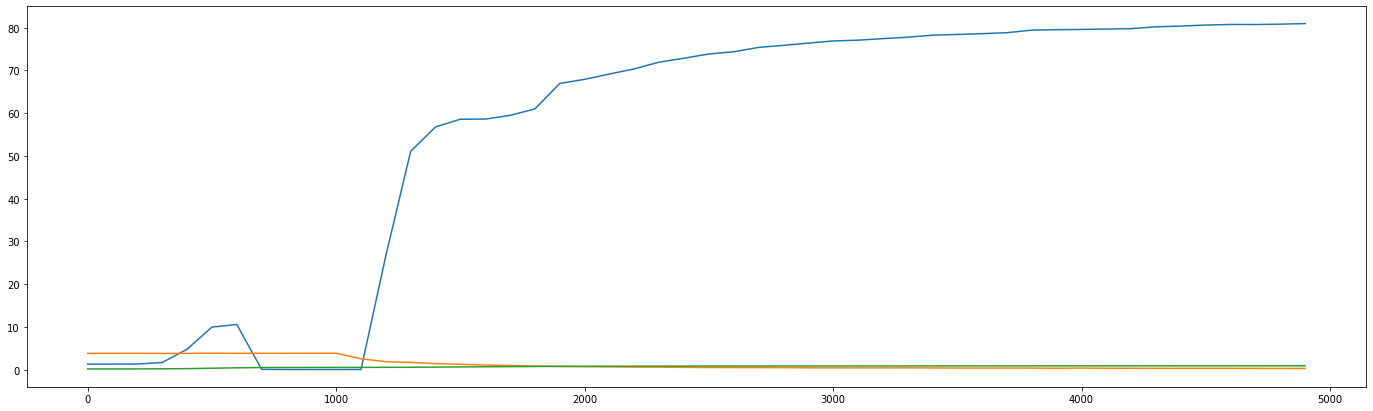

In [ ]:
# Pensez-vous qu'il soit utile d'entraîner le parser plus longtemps ?
data_iteration, data_uas, data_cost, data_correct = parse_output("output.txt")
matplotlib.pyplot.figure(figsize=(24,7))
matplotlib.pyplot.plot(data_iteration, data_uas, label="UAS")
matplotlib.pyplot.plot(data_iteration, data_cost, label="cost")
matplotlib.pyplot.plot(data_iteration, data_correct, label="correct")
matplotlib.pyplot.show()

## 2.	Extraire des données UD les paires sujet-verbe les plus fréquentes

Dans cette 2e partie, vous allez d'abord importer les données UD avec l'annotation syntaxique *en dépendances*, grâce à un convertisseur appelé `nltk.parse.DependencyGraph`.  Celui-ci permet de transformer une phrase annotée au format CONLL (c'est-à-dire sur plusieurs lignes avec un mot et ses annotations par ligne) en un graphe de dépendances.  Vous pourrez ensuite faire des statistiques de fréquences sur les trois fichiers `fr-ud-XXX.conllu3`.

**Note 1** : on ne peut pas utiliser `ConllCorpusReader` comme dans le labo 2, parce que l'information syntaxique des données UD françaises est faite de *dépendances*, or ConllCorpusReader s'attend à trouver une information de faite de *constituants*.

**Note 2** : on utilise ici l'annotation fournie avec le corpus, mais on aurait pu aussi effectuer l'analyse syntaxique avec le parser de Stanford obtenu ci-dessus, pour un texte nouveau.

**Travail demandé**
* Lisez d'abord les [explications fournies par NLTK](http://www.nltk.org/howto/dependency.html) (début de la page)  pour transformer une phrase au format CONLL en un graphe de dépendances (classe `DependencyGraph`) et accéder aux informations de ce graphe.  Ensuite :
* Parcourez le(s) fichier(s) UD phrase par phrase (attention aux espaces dans certains nombres), et créez un graphe de dépendance pour chaque phrase.  Attention, il faut préciser que la relation de plus haut niveau est 'root' (et non 'ROOT').
* Sélectionnez les triplets ayant une relation *nsubj* (entre sujet et verbe).
* Donnez les 10 triplets les plus fréquents dans tout le corpus (train + dev + test).

In [161]:
def get_sentences_from_conll(file):
    phrases = []
    with open(file, 'r', encoding='utf8') as fd:
        lines = fd.readlines()

        phrase = ""
        for line in lines:
            if line == "\n":
                phrases.append(phrase)
                phrase = ""
                continue
            phrase += line + "\n"
    return phrases

In [164]:
# Veuillez écrire ici le code pour ouvrir le fichier 'fr-ud-test.conllu3'
# et lire son contenu dans un tableau de strings (un string = les lignes de chaque phrase).
# Indiquez le nombre de phrases et affichez la phrase d'indice 400 comme exemple.
file = "fr-ud-test.conllu3"
test_sentences = get_sentences_from_conll(file)

print("Number of phrases: ", len(test_sentences))
print("400th phrase: ", test_sentences[399])

Number of phrases:  416
400th phrase:  1	Le	le	DET	_	Definite=Def|Gender=Masc|Number=Sing|PronType=Art	2	det	_	_

2	pré	pré	NOUN	_	Gender=Masc|Number=Sing	11	nsubj	_	_

3	salé	saler	VERB	_	Gender=Masc|Number=Sing|Tense=Past|VerbForm=Part	2	acl	_	_

4	dans	dans	ADP	_	_	7	case	_	_

5	son	son	DET	_	Gender=Masc|Number=Sing|Poss=Yes|PronType=Prs	7	det	_	_

6	dernier	dernier	ADJ	_	Gender=Masc|Number=Sing	7	amod	_	_

7	méandre	méandre	NOUN	_	Gender=Masc|Number=Sing	11	obl	_	_

8	avant	avant	ADP	_	_	10	case	_	_

9	l'	le	DET	_	Definite=Def|Number=Sing|PronType=Art	10	det	_	SpaceAfter=No

10	océan	océan	PROPN	_	_	7	nmod	_	_

11	fait	faire	VERB	_	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	0	root	_	_

12	l'	le	DET	_	Definite=Def|Gender=Masc|Number=Sing|PronType=Art	13	det	_	SpaceAfter=No

13	objet	objet	NOUN	_	Gender=Masc|Number=Sing	11	obj	_	_

14	d'	de	ADP	_	_	16	case	_	SpaceAfter=No

15	un	un	DET	_	Definite=Ind|Gender=Masc|Number=Sing|PronType=Art	16	det	_	_

16	inventaire	inventaire

In [165]:
# Dans les chaînes obtenues, il reste des mots avec des espaces, que l'on veut supprimer.  
# Veuillez écrire ici la ligne de code pour supprimer tous les espaces.
test_sentences = list(map(lambda x: x.replace(" ", ""), test_sentences))

In [129]:
from nltk.parse import DependencyGraph

In [166]:
def get_conll_sentence_dg(conll_phrases):
    dgs = []
    for phrase in test_phrases:
        dgs.append(DependencyGraph(phrase, top_relation_label='root'))
        
    return dgs

def get_nsubj_rel(dg):
    rels = []
    for head, rel, dep in dg.triples():
        if rel == 'nsubj':
            rels.append((head, rel, dep))
    return rels

In [148]:
# Veuillez écrire ici le code pour créer un tableau de graphes de dépendances (1 par phrase)
# et cherchez les relations de type 'nsubj' dans la phrase d'indice 400 du fichier 'test'.
test_dgs = get_conll_sentence_dg(test_sentences)

for rel in get_nsubj_rel(test_dgs[399]):
    print(
        '({h[0]}, {h[1]}), ({d[0]}, {d[1]})'
        .format(h=rel[0], d=rel[2])
    )

(fait, VERB), (pré, NOUN)


In [149]:
# Veuillez écrire ici le code pour extraire la paire (sujet, verbe)
# de la première relation 'nsubj' trouvée ci-dessus.  Il servira ci-dessous.
def get_subj_verb_rel(nsubj_rel):
    return (nsubj_rel[2][0].lower(), nsubj_rel[0][0].lower())
    
test_rel = (("fait", "VERB"), "nsubj", ("pré", "NOUN"))
subject, verb = get_subj_verb_rel(test_rel)

print("Subject: {}\nVerb: {}".format(subject, verb))

Subject: pré
Verb: fait


In [132]:
from nltk.probability import FreqDist

In [158]:
# En utilisant les FreqDist, veuillez afficher les 10 paires 
# (nom, verbe) les plus fréquentes dans le fichier 'test'.
# Pensez convertir les mots en minuscule pour consolider le comptage.
pairs = []
for dg in test_dgs:
    pairs = pairs + list(map(get_subj_verb_rel, get_nsubj_rel(dg)))        
            
fdist = FreqDist(pair for pair in pairs)
print("Ten most frequent subject verb pair:")
print(fdist.most_common()[:10])

Ten most frequent subject verb pair:
[(('il', 'a'), 11), (('on', 'peut'), 5), (('il', 'faut'), 5), (("c'", 'est'), 3), (('il', 'contrôle'), 3), (('il', 'agit'), 3), (('on', 'pourra'), 2), (('on', 'a'), 2), (('qui', 'font'), 2), (('il', 'devient'), 2)]


In [ ]:
# Veuillez consolider ces résultats en regroupant les trois fichiers 'train', 'dev' et 'test'.
# Affichez cette fois-ci les 20 paires (sujet, verbe) les plus fréquentes.
dev_sentences = get_sentences_from_conll("fr-ud-dev.conllu3")
train_sentences = get_sentences_from_conll("fr-ud-train.conllu3")

dev_dgs = get_conll_sentence_dg(dev_sentences)
train_dgs = get_conll_sentence_dg(train_sentences)

dgs = test_dgs + dev_dgs + train_dgs
pairs = []
for dg in dgs:
    pairs = pairs + list(map(get_subj_verb_rel, get_nsubj_rel(dg)))
    
fdist = FreqDist(pair for pair in pairs)
print("Twenty most frequent subject verb pair:")
print(fdist.most_common()[:20])

## 3.	Appliquer un analyseur syntaxique en constituants. Extraire les groupe nominaux

Dans cette 3e partie, vous utiliserez l'analyseur syntaxique en constituants appelé **LexicalizedParser**, toujours fourni parmi les outils CoreNLP de Stanford, et [documenté ici](https://nlp.stanford.edu/nlp/javadoc/javanlp/edu/stanford/nlp/parser/lexparser/LexicalizedParser.html).  

Le code du parser figure dans le même fichier `.jar` que ci-dessus, et vous pouvez télécharger le modèle `frenchFactored.ser.gz` depuis le [Switch Drive](https://drive.switch.ch/index.php/s/R6gXPifDupAbo3l) de l'enseignant (4 MB).  

L'objectif de cette 3e partie est d'extraire les **groupes nominaux** les plus fréquents d'un texte.


**Note** : Pour travailler avec les outils CoreNLP depuis NLTK, la solution la plus récente consiste à démarrer un [serveur CoreNLP](https://stanfordnlp.github.io/CoreNLP/corenlp-server.html), soit depuis NLTK soit en ligne de commande.  Pour mémoire, les commandes sont `java -mx4g -cp "stanford-corenlp-3.9.2.jar;stanford-french-corenlp-2018-01-31-models.jar" edu.stanford.nlp.pipeline.StanfordCoreNLPServer -serverProperties StanfordCoreNLP-french.properties -port 9000 -timeout 15000` ou alors `CoreNLPServer("stanford-corenlp-3.9.2.jar", "stanford-french-corenlp-2018-01-31-models.jar").start()`. Les [modèles pour le français](http://central.maven.org/maven2/edu/stanford/nlp/stanford-corenlp/3.9.2/) font 277 MB.  -- Mais nous n'utiliserons pas cela dans ce qui suit.

In [ ]:
# Veuillez écrire la ligne de commande (java) qui effecte l'analyse syntaxique
# en constituants d'un court texte de votre choix (10 phrases).  Choisissez
# 'oneline' comme format des résultats et écrivez-les dans un ficher.


Vous allez utiliser la classe BracketParseCorpusReader de NLTK pour importer les lignes contenant les analyses syntaxiques vers des objets `Tree` sous NLTK, auquels vous pourrez appliquer diverses fonctions (voir https://www.nltk.org/_modules/nltk/tree.html#Tree), comme demandé ci-dessous.

In [ ]:
from nltk.corpus.reader.bracket_parse import BracketParseCorpusReader

In [ ]:
# Écrivez le code qui importe le fichier de résultats du LexicalizedParser comme une liste d'arbres.
# Cherchez dans la documentation de Tree une fonction d'affichage joli et affichez le premier arbre.


In [ ]:
# Écrivez le code qui extrait les groupes nominaux de toutes les phrases (représentés
# dans votre liste comme des strings), et qui affiche les 10 les plus fréquents.


Veuillez enfin répéter l'expérience avec un texte plus long (une page Wikipedia ou un texte du projet Gutenberg) : indiquez les 20 GN les plus fréquents, et le temps approximatif nécessaire pour le parsing.

## Fin du laboratoire 3

Merci de nettoyer votre feuille, exécuter une dernière fois toutes les instructions, sauvegarder le résultat, et le soumettre sur Cyberlearn.